<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
逻辑回归的因变量是0/1二分类，运用了sigmoid函数将原本的数映射为0/1，所以逻辑回归模型的基本形式为：<br/>
$$y=\frac{1}{1+e^{-(w^Tx+b)}}$$
有p(y=1|x)=$\frac{1}{1+e^{-(w^Tx+b)}}$,p(y=0|x)=1-p(y=1|x)=1-$\frac{1}{1+e^{-(w^Tx+b)}}$ .    若令p(y=1|x)=$\hat{y}$,则p(y=0|x)=1-$\hat{y}$,那么p(y|x)=$\hat{y}^y(1-\hat{y})^{1-y}$,写成对数形式：$$L=\ln{p(y|x)}=y\ln{\hat{y}}+(1-y)\ln{(1-\hat{y})}$$
上式也是交叉熵损失函数，所以LR的损失函数就是交叉熵损失函数。<br/>
分别对w和b求导，进行梯度更新即可求得参数的极大似然估计。一般数据都有多个样本，假设样本数为m，则有
$$\frac{\partial{L}}{\partial{w}}=\frac{1}{m}x(\hat{y}-y)$$
$$\frac{\partial{L}}{\partial{b}}=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}-y)$$

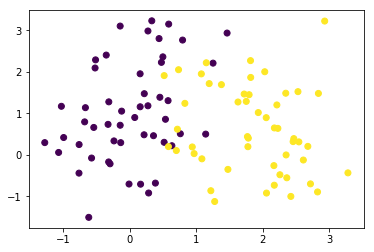

In [39]:
#生成数据
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_classification
X,labels=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels)
plt.show()
# print(X.shape)  #100个样本
# # print(X)


In [70]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
print(y_test)
print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [41]:
#先定义sigmoid函数
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))    
    return z

In [42]:
#初始化w,b
def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

In [54]:
#定义逻辑回归函数主体
def logistic(X,y,w,b):
    num_train =  X.shape[0]
#     print(w.shape,X.shape)
    a = np.dot(X,w)+b
    sigmoid_a = sigmoid(a)
    cost = -1/num_train * (y*np.log(sigmoid_a) + (1-y)*np.log(1-sigmoid_a))
    dW = np.dot(X.T,(sigmoid_a-y))/num_train
    db = np.sum(sigmoid_a-y)/num_train
    cost_function = np.squeeze(cost)
    return sigmoid_a,cost_function,dW,db

In [58]:
#参数更新
def train(X,y,learning_rate,epochs):
    w,b = initialize_params(X.shape[1])
    cost_list = []
    for i in range(epochs):
        a,cost,dW,db = logistic(X,y,w,b)
        w = w - learning_rate * dW
        b = b - learning_rate * db
        if i % 100 == 0:
            cost_list.append(cost)
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, np.mean(cost_list))) 
    params = {
        'W':w,
        'b':b
    }
    grads = {
        'dW':dW,
        'db':db
    }
    return cost_list, params, grads

In [63]:
def predict(X,params):
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b'])
#     print(len(y_prediction))
    for i in range(len(y_prediction)):
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction

In [60]:
cost_list, params, grads = train(X_train, y_train, 0.01, 1200)

epoch 0 cost 0.007702
epoch 100 cost 0.006929
epoch 200 cost 0.006401
epoch 300 cost 0.006008
epoch 400 cost 0.005701
epoch 500 cost 0.005451
epoch 600 cost 0.005243
epoch 700 cost 0.005066
epoch 800 cost 0.004913
epoch 900 cost 0.004778
epoch 1000 cost 0.004659
epoch 1100 cost 0.004553


In [74]:
#计算分类准确率
def acc(y_true,y_pred):
    correct_num = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_num+=1
    accuracy_score = correct_num / len(y_true) 
    return accuracy_score

In [75]:
y_train_predict = predict(X_train,params)
# print(y_train)
train_predacc = acc(y_train,y_train_predict)
print(train_predacc)

0.8888888888888888


In [66]:
y_prediction = predict(X_test, params)  #用测试集来预测
print(y_prediction)
print(y_prediction.shape)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]
(10, 1)


In [76]:
accuracy_score_train = acc(y_test, y_prediction)
print(accuracy_score_train)

1.0


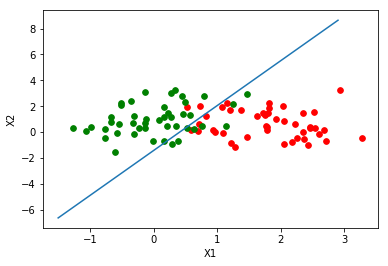

In [80]:
#模型可视化
def plot_logistic(X_train, y_train, params):
    n = X_train.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []    
    for i in range(n):        
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])        
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    x = np.arange(-1.5, 3, 0.1)
    y = -(params['b'] + params['W'][0] * x) / params['W'][1]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_logistic(X_train, y_train, params)